In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import numpy as np

with open("../extra/randomseed/example_result.pickle", "rb") as f:
    result = pickle.load(f)

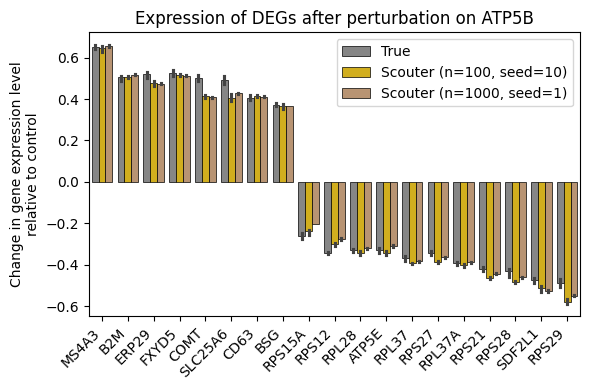

In [2]:
condition = result["condition"].split("+")[0]
degs_idx = result["degs_idx"]
degs_name = result["degs_name"]
ctrl = result["ctrl"]
pred_100_10 = result["pred_100_10"]
pred_1000_1 = result["pred_1000_1"]
true = result["true"]

mask = degs_name != condition
degs_idx = degs_idx[mask]
degs_name = degs_name[mask]

delta_pred_100_10 = pred_100_10 - ctrl
delta_pred_1000_1 = pred_1000_1 - ctrl
delta_true = true - ctrl

delta_pred_100_10_degs = delta_pred_100_10[:, degs_idx]
delta_pred_1000_1_degs = delta_pred_1000_1[:, degs_idx]
delta_true_degs = delta_true[:, degs_idx]

# Create dataframe for plotting
df_true = pd.DataFrame(delta_true_degs, columns=degs_name).assign(Group='True')
df_pred_100_10 = pd.DataFrame(delta_pred_100_10_degs, columns=degs_name).assign(Group='Scouter (n=100, seed=10)')
df_pred_1000_1 = pd.DataFrame(delta_pred_1000_1_degs, columns=degs_name).assign(Group='Scouter (n=1000, seed=1)')

degs_ordered = degs_name[np.argsort(-delta_true_degs.mean(axis=0))].tolist()
df_combined = pd.concat([df_true, df_pred_100_10, df_pred_1000_1])[degs_ordered+["Group"]]
df_melted = df_combined.melt(id_vars='Group', var_name='Gene', value_name='Delta Expression')

# Plot
palette = {
    'True': '#868686FF',
    'Scouter (n=100, seed=10)': '#EFC000FF',
    'Scouter (n=1000, seed=1)': '#c39468'
}
plt.figure(figsize=(6, 4))
sns.barplot(data=df_melted, x='Gene', y='Delta Expression', hue='Group', edgecolor='black',
            estimator=np.median, palette=palette, linewidth=0.5, errorbar=('ci', 50))

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title(f'Expression of DEGs after perturbation on {condition}')
plt.xlabel('')
plt.ylabel('Change in gene expression level\nrelative to control')
plt.legend(title=None, loc='upper right')
plt.tight_layout()
plt.show()
